1/1 [==============================] - 1s 713ms/step
Epoch: 0, Discriminator Loss: 0.6914333403110504, Generator Loss: 0.6848592758178711
1/1 [==============================] - 0s 54ms/step
Epoch: 10, Discriminator Loss: 0.6823965609073639, Generator Loss: 0.619552493095398
1/1 [==============================] - 0s 131ms/step
Epoch: 20, Discriminator Loss: 0.7391970157623291, Generator Loss: 0.5536116361618042
1/1 [==============================] - 0s 36ms/step
Epoch: 30, Discriminator Loss: 0.7114258110523224, Generator Loss: 0.6405792236328125
1/1 [==============================] - 0s 139ms/step
Epoch: 40, Discriminator Loss: 0.6503008306026459, Generator Loss: 0.8709059357643127
1/1 [==============================] - 0s 65ms/step
Epoch: 50, Discriminator Loss: 0.6204199492931366, Generator Loss: 1.0137219429016113
1/1 [==============================] - 0s 21ms/step
Epoch: 60, Discriminator Loss: 0.6800985336303711, Generator Loss: 0.8445305824279785
1/1 [============================

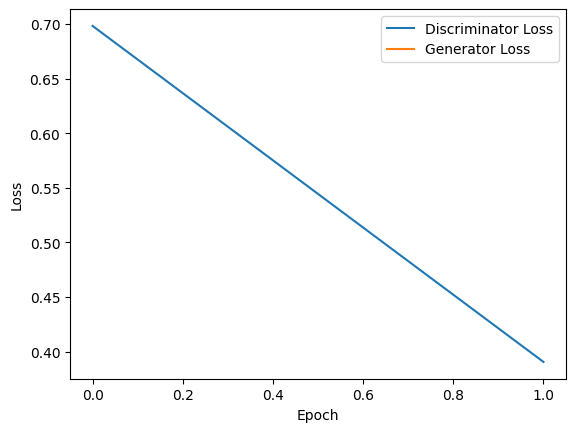

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
from keras.optimizers import Adam

# Generate synthetic data
# Replace this with your actual rainfall dataset
# For demonstration purposes, let's generate synthetic data
# Here, X represents some input features and y represents the rainfall amount
X = np.random.rand(1000, 10)  # Example input features
y = np.random.rand(1000, 1)    # Example rainfall data

# Define the Generator model
generator = Sequential()
generator.add(Dense(256, input_shape=(10,), activation='relu'))
generator.add(Dense(1, activation='linear'))

# Define the Discriminator model
discriminator = Sequential()
discriminator.add(Dense(256, input_shape=(1,), activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the Discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Combined model (Generator stacked on Discriminator)
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=Adam())

# Training parameters
epochs = 100
batch_size = 32

# Training loop
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, X.shape[0], batch_size)
    real_rainfall = y[idx]
    noise = np.random.normal(0, 1, (batch_size, 10))
    fake_rainfall = generator.predict(noise)
    discriminator_loss_real = discriminator.train_on_batch(real_rainfall, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_rainfall, np.zeros((batch_size, 1)))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 10))
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Plot loss graph
plt.plot(discriminator_loss, label='Discriminator Loss')
plt.plot(generator_loss, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
